In [1]:
# 환경 설정
from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()

tts = skms.train_test_split(iris.data, iris.target, 
                            test_size=.33, random_state=21)

(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt,  iris_test_tgt) = tts

In [2]:
# 기본 사용방법: 모델을 만들고 적합하고 예측하고 평가합니다.
baseline = dummy.DummyClassifier(strategy="most_frequent")
baseline.fit(iris_train_ftrs, iris_train_tgt)
base_preds = baseline.predict(iris_test_ftrs)
base_acc = metrics.accuracy_score(base_preds, iris_test_tgt)
print(base_acc)

0.3


In [3]:
strategies = ['constant', 'uniform', 'stratified', 
              'prior', 'most_frequent']

# 여러 더미 분류모델을 만들기 위한 설정을 준비합니다.
baseline_args = [{'strategy':s} for s in strategies]
baseline_args[0]['constant'] = 0 # # 클래스 0은 세토사입니다.

accuracies = []
for bla in baseline_args:
    baseline = dummy.DummyClassifier(**bla)
    baseline.fit(iris_train_ftrs, iris_train_tgt)
    base_preds = baseline.predict(iris_test_ftrs)
    accuracies.append(metrics.accuracy_score(base_preds, iris_test_tgt))
    
display(pd.DataFrame({'accuracy':accuracies}, index=strategies))

,accuracy
constant,0.3600
uniform,0.3800
stratified,0.3400
prior,0.3000
most_frequent,0.3000


In [4]:
# 너비에 맞추어 깔끔하게 결과를 출력해주는 도구입니다
import textwrap
print(textwrap.fill(str(sorted(metrics.SCORERS.keys())), 
                    width=70))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score',
'average_precision', 'balanced_accuracy', 'brier_score_loss',
'completeness_score', 'explained_variance', 'f1', 'f1_macro',
'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score',
'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro',
'jaccard_samples', 'jaccard_weighted', 'max_error',
'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error',
'neg_mean_squared_error', 'neg_mean_squared_log_error',
'neg_median_absolute_error', 'normalized_mutual_info_score',
'precision', 'precision_macro', 'precision_micro',
'precision_samples', 'precision_weighted', 'r2', 'recall',
'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted',
'roc_auc', 'v_measure_score']


In [5]:
knn = neighbors.KNeighborsClassifier()

# help(knn.score) # 내용이 조금 깁니다

print(knn.score.__doc__.splitlines()[0])
print('\n---and---\n')
print("\n".join(knn.score.__doc__.splitlines()[-6:]))

Returns the mean accuracy on the given test data and labels.

---and---

        Returns
        -------
        score : float
            Mean accuracy of self.predict(X) wrt. y.

        


In [6]:
tgt_preds = (neighbors.KNeighborsClassifier()
                      .fit(iris_train_ftrs, iris_train_tgt)
                      .predict(iris_test_ftrs))

print("accuracy:", metrics.accuracy_score(iris_test_tgt, 
                                          tgt_preds))

cm = metrics.confusion_matrix(iris_test_tgt, 
                              tgt_preds)
print("confusion matrix:", cm, sep="\n")

accuracy: 0.94
confusion matrix:
[[18  0  0]
 [ 0 16  1]
 [ 0  2 13]]


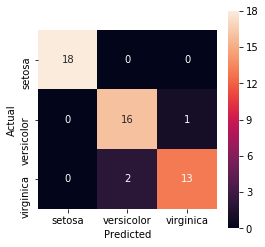

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris.target_names, 
                 yticklabels=iris.target_names)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [8]:
macro_prec = metrics.precision_score(iris_test_tgt, 
                                     tgt_preds, 
                                     average='macro')
print("macro:", macro_prec)

cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
n_labels = len(iris.target_names)
print("should equal 'macro avg':", 
      # 열의 정답 개수       열의 합              # 열 개수
      (np.diag(cm) / cm.sum(axis=0)).sum() / n_labels)

macro: 0.9391534391534391
should equal 'macro avg': 0.9391534391534391


In [9]:
print("micro:", metrics.precision_score(iris_test_tgt, 
                                        tgt_preds, 
                                        average='micro'))

cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
print("should equal avg='micro':", 
      # TP.sum()        / (TP&FP).sum() --> 
      # 모든 정답 개수     / 모든 예측 개수
      np.diag(cm).sum() / cm.sum())

micro: 0.94
should equal avg='micro': 0.94


In [10]:
print(metrics.classification_report(iris_test_tgt, 
                                    tgt_preds))
# 평균은 가중 매크로 평균입니다.

# 각 행의 합을 검증합니다.
cm = metrics.confusion_matrix(iris_test_tgt, tgt_preds)
print("row counts equal support:", cm.sum(axis=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      0.94      0.91        17
           2       0.93      0.87      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

row counts equal support: [18 17 15]


In [11]:
# 주의: 숫자 1입니다.
is_versicolor = iris.target == 1
tts_1c = skms.train_test_split(iris.data, is_versicolor, 
                               test_size=.33, random_state = 21)
(iris_1c_train_ftrs, iris_1c_test_ftrs, 
 iris_1c_train_tgt,  iris_1c_test_tgt) = tts_1c

# 나이브 베이즈 모델을 만들고, 학습하고, 확률 점수를 예측합니다.
gnb = naive_bayes.GaussianNB()
prob_true = (gnb.fit(iris_1c_train_ftrs, iris_1c_train_tgt)
                .predict_proba(iris_1c_test_ftrs)[:,1]) # [:,1]=="True"

FPR : [0.     0.     0.     0.0606 0.0606 0.1212 0.1212 0.1818 1.    ]
TPR : [0.     0.0588 0.8824 0.8824 0.9412 0.9412 1.     1.     1.    ]


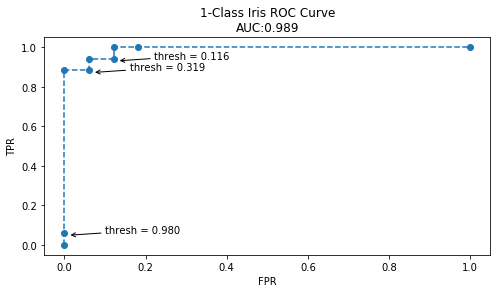

In [12]:
fpr, tpr, thresh = metrics.roc_curve(iris_1c_test_tgt, 
                                     prob_true)
auc = metrics.auc(fpr, tpr)
print("FPR : {}".format(fpr), 
      "TPR : {}".format(tpr), sep='\n')


# 메인 그래프를 생성합니다.
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(fpr, tpr, 'o--')
ax.set_title("1-Class Iris ROC Curve\nAUC:{:.3f}".format(auc))
ax.set_xlabel("FPR") 
ax.set_ylabel("TPR");

# 각각의 기준선에 해당되는 몇가지 점에 라벨을 표시합니다.
investigate = np.array([1,3,5])
for idx in investigate:
    th, f, t = thresh[idx], fpr[idx], tpr[idx]
    ax.annotate('thresh = {:.3f}'.format(th), 
                xy=(f+.01, t-.01), xytext=(f+.1, t),
                arrowprops = {'arrowstyle':'->'})

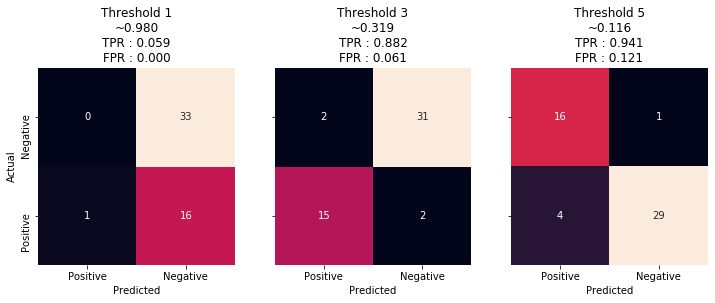

In [13]:
title_fmt = "Threshold {}\n~{:5.3f}\nTPR : {:.3f}\nFPR : {:.3f}"

pn = ['Positive', 'Negative']
add_args = {'xticklabels': pn,
            'yticklabels': pn,
            'square':True}

fig, axes = plt.subplots(1,3, sharey = True, figsize=(12,4))
for ax, thresh_idx in zip(axes.flat, investigate):
    preds_at_th = prob_true < thresh[thresh_idx]
    cm = metrics.confusion_matrix(1-iris_1c_test_tgt, preds_at_th)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax,
                **add_args)

    ax.set_xlabel('Predicted')
    ax.set_title(title_fmt.format(thresh_idx, 
                                  thresh[thresh_idx],
                                  tpr[thresh_idx], 
                                  fpr[thresh_idx]))

axes[0].set_ylabel('Actual');
# 세번째 임계값을 예로 들면..
# FPR = 1-spec = 1 - 31/(31+2) = 1 - 31/33 = 0.0606...

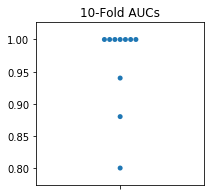

In [14]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
model = neighbors.KNeighborsClassifier(3)
cv_auc = skms.cross_val_score(model, iris.data, iris.target==1, 
                              scoring='roc_auc', cv=10)
ax = sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold AUCs');

In [15]:
checkout = [0,50,100]
print("Original Encoding")
print(iris.target[checkout])

Original Encoding
[0 1 2]


In [16]:
print("'Multi-label' Encoding")
print(skpre.label_binarize(iris.target, [0,1,2])[checkout])

'Multi-label' Encoding
[[1 0 0]
 [0 1 0]
 [0 0 1]]


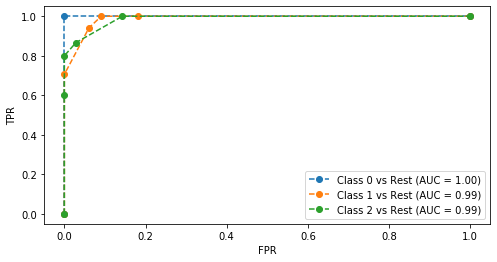

In [17]:
iris_multi_tgt = skpre.label_binarize(iris.target, [0,1,2])

(im_train_ftrs, im_test_ftrs, 
 im_train_tgt,  im_test_tgt) = skms.train_test_split(iris.data, 
                                                     iris_multi_tgt,
                                                     test_size=.33,
                                                     random_state=21)

# 하나-대-나머지 방식으로 k-최근접이웃 모델 적용 (3개 모델)
knn        = neighbors.KNeighborsClassifier(n_neighbors=5)
ovr_knn    = skmulti.OneVsRestClassifier(knn) 
pred_probs = (ovr_knn.fit(im_train_ftrs, im_train_tgt)
                     .predict_proba(im_test_ftrs))

# ROC 플롯 생성
lbl_fmt = "Class {} vs Rest (AUC = {:.2f})"
fig,ax = plt.subplots(figsize=(8,4))
for cls in [0,1,2]:
    fpr, tpr, _ = metrics.roc_curve(im_test_tgt[:,cls], 
                                    pred_probs[:,cls])
    label = lbl_fmt.format(cls, metrics.auc(fpr,tpr))
    ax.plot(fpr, tpr, 'o--', label=label)
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR");

In [18]:
knn         = neighbors.KNeighborsClassifier(n_neighbors=5)
ovo_knn     = skmulti.OneVsOneClassifier(knn) 
pred_scores = (ovo_knn.fit(iris_train_ftrs, iris_train_tgt)
                     .decision_function(iris_test_ftrs))
df = pd.DataFrame(pred_scores)
df['class'] = df.values.argmax(axis=1)
display(df.head())

,0,1,2,class
0,-0.2222,2.1667,1.1667,1
1,2.0000,1.0000,0.0000,0
2,2.0000,1.0000,0.0000,0
3,2.0000,1.0000,0.0000,0
4,-0.2222,2.1667,1.1667,1


In [19]:
# 노트: 테이블을 예쁘게 만들기 위해 열 제목을 추가합니다.
mi = pd.MultiIndex([['Class Indicator', 'Vote'], [0, 1, 2]],
                    [[0]*3+[1]*3,list(range(3)) * 2])
df = pd.DataFrame(np.c_[im_test_tgt, pred_scores], 
                  columns=mi)
display(df.head())

Class Indicator                                            \
                     0                    1                    2   
0               0.0000               1.0000               0.0000   
1               1.0000               0.0000               0.0000   
2               1.0000               0.0000               0.0000   
3               1.0000               0.0000               0.0000   
4               0.0000               1.0000               0.0000   

                  Vote                                            
                     0                    1                    2  
0              -0.2222               2.1667               1.1667  
1               2.0000               1.0000               0.0000  
2               2.0000               1.0000               0.0000  
3               2.0000               1.0000               0.0000  
4              -0.2222               2.1667               1.1667

In [20]:
def hand_and_till_M_statistic(test_tgt, test_probs, weighted=False):
    def auc_helper(truth, probs):
        fpr, tpr, _ = metrics.roc_curve(truth, probs)
        return metrics.auc(fpr, tpr)

    classes   = np.unique(test_tgt)
    n_classes = len(classes)

    indicator = skpre.label_binarize(test_tgt, classes)
    avg_auc_sum = 0.0

    # 클래스 i와 j를 비교합니다.
    for ij in it.combinations(classes, 2):
        # sum을 논리연산자 OR처럼 이용합니다.
        ij_indicator = indicator[:,ij].sum(axis=1, 
                                           dtype=np.bool)
        
        # .ix_를 이용해서 필요한 행만 골라냅니다.
        ij_probs    = test_probs[np.ix_(ij_indicator, ij)]
        ij_test_tgt = test_tgt[ij_indicator]

        i,j = ij
        auc_ij = auc_helper(ij_test_tgt==i, ij_probs[:,0]) 
        auc_ji = auc_helper(ij_test_tgt==j, ij_probs[:,1]) 

        # Hand and Till 레퍼런스와의 차이점
		# 뒷 부분에서 상쇄될 것이므로 여기에서 2를 나누지 않습니다.
        avg_auc_ij = (auc_ij + auc_ji) 

        if weighted:
            avg_auc_ij *= ij_indicator.sum() / len(test_tgt)
        avg_auc_sum += avg_auc_ij

    # Hand and Till 레퍼런스와의 차이점
	# 앞에서 2로 나누는 부분을 제외했으므로,
	# 2를 곱하는 부분을 제외합니다.
    M = avg_auc_sum / (n_classes * (n_classes-1)) 
    return M

In [21]:
knn = neighbors.KNeighborsClassifier()
knn.fit(iris_train_ftrs, iris_train_tgt)
test_probs = knn.predict_proba(iris_test_ftrs)
hand_and_till_M_statistic(iris_test_tgt, test_probs)

0.9915032679738562

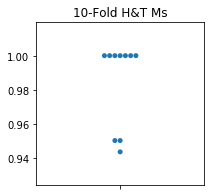

In [22]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
htm_scorer = metrics.make_scorer(hand_and_till_M_statistic, 
                                 needs_proba=True)
cv_auc = skms.cross_val_score(model, 
                              iris.data, iris.target, 
                              scoring=htm_scorer, cv=10)
sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold H&T Ms');

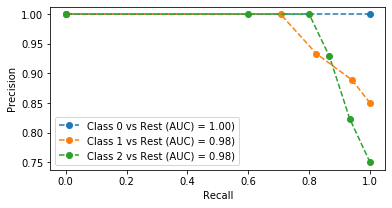

In [23]:
fig,ax = plt.subplots(figsize=(6,3))
for cls in [0,1,2]:
    prc = metrics.precision_recall_curve
    precision, recall, _ = prc(im_test_tgt[:,cls], 
                               pred_probs[:,cls])
    prc_auc = metrics.auc(recall, precision)
    label = "Class {} vs Rest (AUC) = {:.2f})".format(cls, prc_auc) 
    ax.plot(recall, precision, 'o--', label=label)
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision');

In [24]:
# b/c에 음수를 취해서 큰 수부터 정렬합니다.
myorder = np.argsort(-prob_true)

# 누적합을 구하고 총 합으로 나눠 퍼센트를 구합니다. (마지막 값이 총 합입니다.)
realpct_myorder = iris_1c_test_tgt[myorder].cumsum()       
realpct_myorder = realpct_myorder / realpct_myorder[-1]

# 데이터 개수를 퍼센트로 변환합니다.
N = iris_1c_test_tgt.size
xs = np.linspace(1/N,1,N)

print(myorder[:3])

[ 0 28 43]


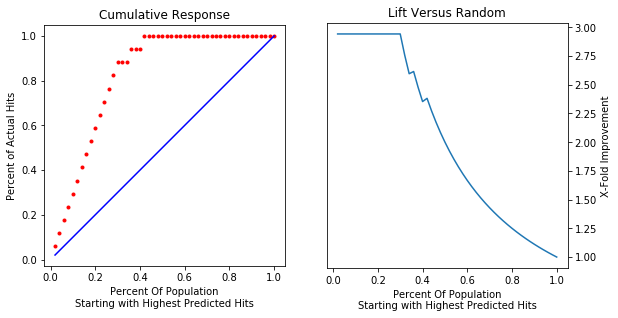

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.tight_layout()

# 누적 반응
ax1.plot(xs, realpct_myorder, 'r.')
ax1.plot(xs, xs, 'b-')
ax1.axes.set_aspect('equal')

ax1.set_title("Cumulative Response")
ax1.set_ylabel("Percent of Actual Hits")
ax1.set_xlabel("Percent Of Population\n" +
               "Starting with Highest Predicted Hits")

# 리프트
# 0 대신 1.0으로 나누어 줍니다.
ax2.plot(xs, realpct_myorder / np.where(xs > 0, xs, 1))

ax2.set_title("Lift Versus Random")
ax2.set_ylabel("X-Fold Improvement")
ax2.set_xlabel("Percent Of Population\n" + 
               "Starting with Highest Predicted Hits")
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right');

In [26]:
classifiers = {'base'  : baseline,
               'gnb'   : naive_bayes.GaussianNB(),
               '3-NN'  : neighbors.KNeighborsClassifier(n_neighbors=10),
               '10-NN' : neighbors.KNeighborsClassifier(n_neighbors=3)}

In [27]:
# iris 문제의 클래스를 1과 같은지 여부로 이진화합니다. 
iris_onec_ftrs = iris.data
iris_onec_tgt  = iris.target==1

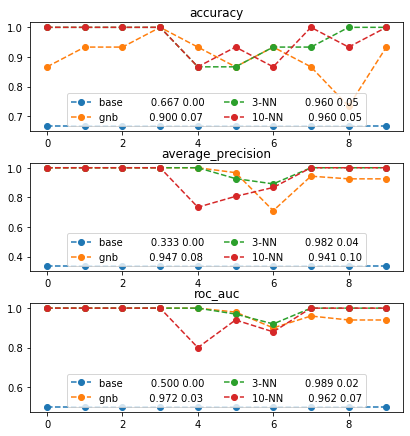

In [28]:
msrs = ['accuracy', 'average_precision', 'roc_auc']

fig, axes = plt.subplots(len(msrs), 1, figsize=(6, 2*len(msrs)))
fig.tight_layout()

for mod_name, model in classifiers.items():
    # 약어를 사용하겠습니다.
    cvs = skms.cross_val_score
    cv_results = {msr:cvs(model, iris_onec_ftrs, iris_onec_tgt,
                          scoring=msr, cv=10) for msr in msrs}
    
    for ax, msr in zip(axes, msrs):
        msr_results = cv_results[msr]
        my_lbl = "{:12s} {:.3f} {:.2f}".format(mod_name, 
                                               msr_results.mean(), 
                                               msr_results.std())
        ax.plot(msr_results, 'o--', label=my_lbl)
        ax.set_title(msr)
        ax.legend(loc='lower center', ncol=2)

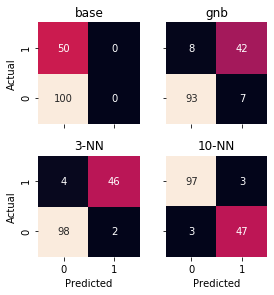

In [29]:
fig, axes = plt.subplots(2,2, figsize=(4,4), sharex=True, sharey=True)
fig.tight_layout()

for ax, (mod_name, model) in zip(axes.flat, classifiers.items()):
    preds = skms.cross_val_predict(model, 
                                   iris_onec_ftrs, iris_onec_tgt, 
                                   cv=10)
    
    cm = metrics.confusion_matrix(iris.target==1, preds)
    sns.heatmap(cm, annot=True, ax=ax, 
                cbar=False, square=True, fmt="d")
    
    ax.set_title(mod_name)
    
axes[1,0].set_xlabel('Predicted')
axes[1,1].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')
axes[1,0].set_ylabel('Actual');

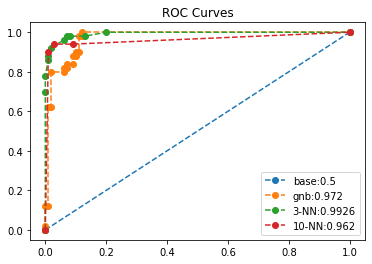

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

cv_prob_true = {}
for mod_name, model in classifiers.items():
    cv_probs = skms.cross_val_predict(model, 
                                      iris_onec_ftrs, iris_onec_tgt, 
                                      cv=10, method='predict_proba')
    cv_prob_true[mod_name] = cv_probs[:,1]
    
    fpr, tpr, thresh = metrics.roc_curve(iris_onec_tgt, 
                                         cv_prob_true[mod_name])
    
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, 'o--', label="{}:{}".format(mod_name, auc))

ax.set_title('ROC Curves')
ax.legend();

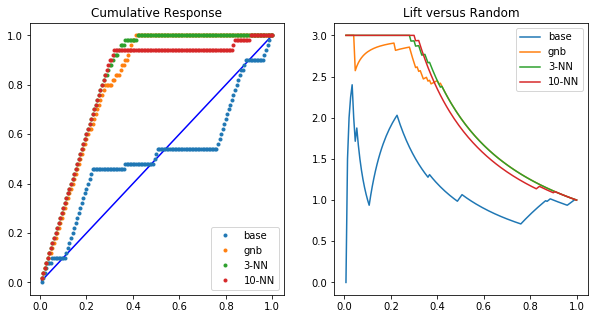

In [31]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

N = len(iris_onec_tgt)
xs = np.linspace(1/N,1,N)

ax1.plot(xs, xs, 'b-')

for mod_name in classifiers:    
    # 음수를 취해서 내림차순으로 정렬합니다.
    myorder = np.argsort(-cv_prob_true[mod_name])

    # 누적합을 구한 후 퍼센트로 변환합니다 (마지막 값이 총합이 됩니다.)
    realpct_myorder = iris_onec_tgt[myorder].cumsum()       
    realpct_myorder = realpct_myorder / realpct_myorder[-1]
    
    ax1.plot(xs, realpct_myorder, '.', label=mod_name)
    
    ax2.plot(xs, 
            realpct_myorder / np.where(xs > 0, xs, 1),
            label=mod_name)
ax1.legend()
ax2.legend()

ax1.set_title("Cumulative Response")
ax2.set_title("Lift versus Random");

In [33]:
# 이 코드는 portugese_student_numeric_discrete.csv 파일이 필요합니다.
# data 폴더 안에 csv 파일을 준비해 두었습니다. 그대로 이어서 실습하면 됩니다.

student_df = pd.read_csv('data/portugese_student_numeric_discrete.csv')
student_df['grade'] = pd.Categorical(student_df['grade'], 
                                     categories=['low', 'mid', 'high'], 
                                     ordered=True)

In [34]:
student_ftrs = student_df[student_df.columns[:-1]]
student_tgt  = student_df['grade'].cat.codes

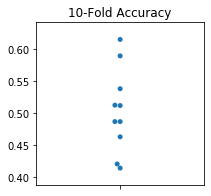

In [35]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
model = neighbors.KNeighborsClassifier(3)
cv_auc = skms.cross_val_score(model, 
                              student_ftrs, student_tgt, 
                              scoring='accuracy', cv=10)
ax = sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold Accuracy');

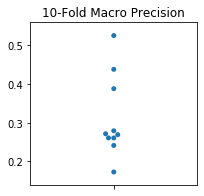

In [36]:
model = neighbors.KNeighborsClassifier(3)
my_scorer = metrics.make_scorer(metrics.precision_score,
                                average='macro')
cv_auc = skms.cross_val_score(model, 
                              student_ftrs, student_tgt, 
                              scoring=my_scorer, cv=10)
fig,ax = plt.subplots(1,1,figsize=(3,3))
sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold Macro Precision');

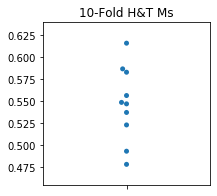

In [37]:
htm_scorer = metrics.make_scorer(hand_and_till_M_statistic, 
                                 needs_proba=True)
cv_auc = skms.cross_val_score(model, 
                              student_ftrs, student_tgt, 
                              scoring=htm_scorer, cv=10)

fig,ax = plt.subplots(1,1,figsize=(3,3))
sns.swarmplot(cv_auc, orient='v')
ax.set_title('10-Fold H&T Ms');

In [38]:
classifiers = {'base'  : dummy.DummyClassifier(strategy="most_frequent"),
               'gnb'   : naive_bayes.GaussianNB(),
               '3-NN'  : neighbors.KNeighborsClassifier(n_neighbors=10),
               '10-NN' : neighbors.KNeighborsClassifier(n_neighbors=3)}

/Users/jun/opt/anaconda3/envs/book_base/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jun/opt/anaconda3/envs/book_base/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jun/opt/anaconda3/envs/book_base/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jun/opt/anaconda3/envs/book_base/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

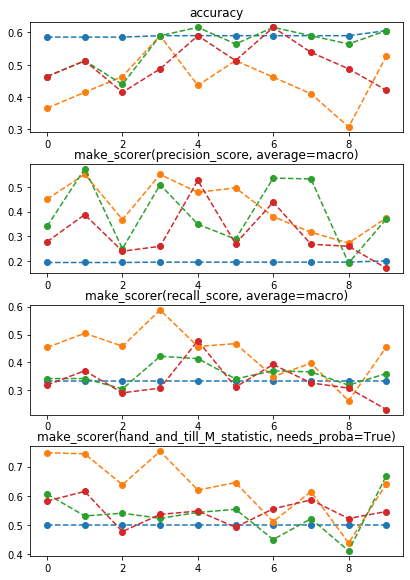

In [39]:
macro_precision = metrics.make_scorer(metrics.precision_score,
                                      average='macro')
macro_recall    = metrics.make_scorer(metrics.recall_score,
                                      average='macro')
htm_scorer = metrics.make_scorer(hand_and_till_M_statistic, 
                                 needs_proba=True)

msrs = ['accuracy', macro_precision, 
        macro_recall, htm_scorer]

fig, axes = plt.subplots(len(msrs), 1, figsize=(6, 2*len(msrs)))
fig.tight_layout()

for mod_name, model in classifiers.items():
    # 약어를 사용합니다.
    cvs = skms.cross_val_score
    cv_results = {msr:cvs(model, student_ftrs, student_tgt,
                          scoring=msr, cv=10) for msr in msrs}
    
    for ax, msr in zip(axes, msrs):
        msr_results = cv_results[msr]
        my_lbl = "{:12s} {:.3f} {:.2f}".format(mod_name, 
                                               msr_results.mean(), 
                                               msr_results.std())
        ax.plot(msr_results, 'o--')
        ax.set_title(msr)


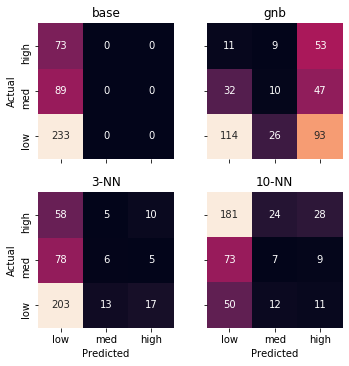

In [40]:
fig, axes = plt.subplots(2,2, figsize=(5,5), sharex=True, sharey=True)
fig.tight_layout()

for ax, (mod_name, model) in zip(axes.flat, 
                                 classifiers.items()):
    preds = skms.cross_val_predict(model, 
                                   student_ftrs, student_tgt, 
                                   cv=10)
    
    cm = metrics.confusion_matrix(student_tgt, preds)
    sns.heatmap(cm, annot=True, ax=ax, 
                cbar=False, square=True, fmt="d",
                xticklabels=['low', 'med', 'high'],
                yticklabels=['low', 'med', 'high'])
    
    ax.set_title(mod_name)
axes[1,0].set_xlabel('Predicted')
axes[1,1].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')
axes[1,0].set_ylabel('Actual');